# Import libraries and read the dataset

In [101]:
# Import pandas for dataframe usage.
import pandas as pd
# Import matplotlib.pyplot for basic plotting.
import matplotlib.pyplot as plt
# Import seaborn for advanced plotting and plot styling.
import seaborn as sns
import numpy as np
from sklearn.metrics import mean_squared_error,make_scorer
from sklearn.metrics import accuracy_score
from sklearn.metrics import r2_score
from sklearn.linear_model import LinearRegression, RidgeCV, LassoCV
from sklearn.model_selection import cross_val_score, train_test_split
# Import general statsmodels api
import statsmodels.api as sm
# Import statsmodels for statistics functions.
import statsmodels.formula.api as smf
import warnings
warnings.filterwarnings("ignore")
from sklearn.model_selection import GridSearchCV, cross_val_score   #Perforing grid search
from sklearn.model_selection import KFold

In [190]:
kc_df = pd.read_csv('kc_house_data.csv')
kc_df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


# Explore Data Analysis. Find out how one variable related to other and distributions of data and state your insights.

In [111]:
# printing size and shape 
print("Shape = {}". 
format(kc_df.shape))

Shape = (21613, 21)


In [188]:
kc_df.info()
kc_df.describe().T

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 91 columns):
date             21613 non-null datetime64[ns]
price            21613 non-null float64
bedrooms         21613 non-null int64
bathrooms        21613 non-null float64
sqft_living      21613 non-null int64
sqft_lot         21613 non-null int64
floors           21613 non-null float64
waterfront       21613 non-null int64
view             21613 non-null int64
condition        21613 non-null int64
grade            21613 non-null int64
sqft_above       21613 non-null int64
sqft_basement    21613 non-null int64
yr_built         21613 non-null int64
yr_renovated     21613 non-null int64
lat              21613 non-null float64
long             21613 non-null float64
sqft_living15    21613 non-null int64
sqft_lot15       21613 non-null int64
Is_renovated     21613 non-null int64
zipcode_98002    21613 non-null uint8
zipcode_98003    21613 non-null uint8
zipcode_98004    21613 non-null uint

,count,mean,std,min,25%,50%,75%,max
price,21613.0,540088.141767,367127.196483,75000.0000,321950.000,450000.0000,645000.000,7.700000e+06
bedrooms,21613.0,3.370842,0.930062,0.0000,3.000,3.0000,4.000,3.300000e+01
bathrooms,21613.0,2.114757,0.770163,0.0000,1.750,2.2500,2.500,8.000000e+00
sqft_living,21613.0,2079.899736,918.440897,290.0000,1427.000,1910.0000,2550.000,1.354000e+04
sqft_lot,21613.0,15106.967566,41420.511515,520.0000,5040.000,7618.0000,10688.000,1.651359e+06
floors,21613.0,1.494309,0.539989,1.0000,1.000,1.5000,2.000,3.500000e+00
waterfront,21613.0,0.007542,0.086517,0.0000,0.000,0.0000,0.000,1.000000e+00
view,21613.0,0.234303,0.766318,0.0000,0.000,0.0000,0.000,4.000000e+00
condition,21613.0,3.409430,0.650743,1.0000,3.000,3.0000,4.000,5.000000e+00
grade,21613.0,7.656873,1.175459,1.0000,7.000,7.0000,8.000,1.300000e+01


In [191]:
# count missing values
pd.DataFrame(kc_df.isnull().sum(), columns=["number of missing values"])

,number of missing values
id,0
date,0
price,0
bedrooms,0
bathrooms,0
sqft_living,0
sqft_lot,0
floors,0
waterfront,0
view,0


In [192]:
# id column of the dataframe shall simply be removed
kc_df.drop('id', axis=1, inplace=True)

Text(0, 0.5, 'Frequency')

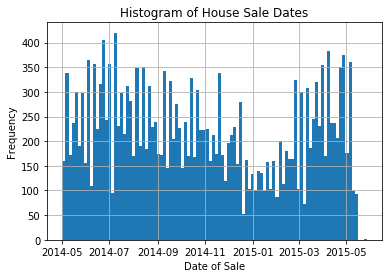

In [193]:
kc_df.date = pd.to_datetime(kc_df.date)
# Visually check all correct dates within our range with histogram.
kc_df.date.hist(bins=100)
plt.title('Histogram of House Sale Dates')
plt.xlabel('Date of Sale')
plt.ylabel('Frequency')

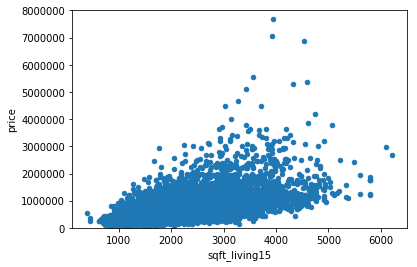

In [118]:
var = 'sqft_living15'
data = pd.concat([kc_df['price'], kc_df[var]], axis=1)
data.plot.scatter(x=var, y='price', ylim=(3,8000000));

###### There's clearly a linear relationship with a significant portion of outliers

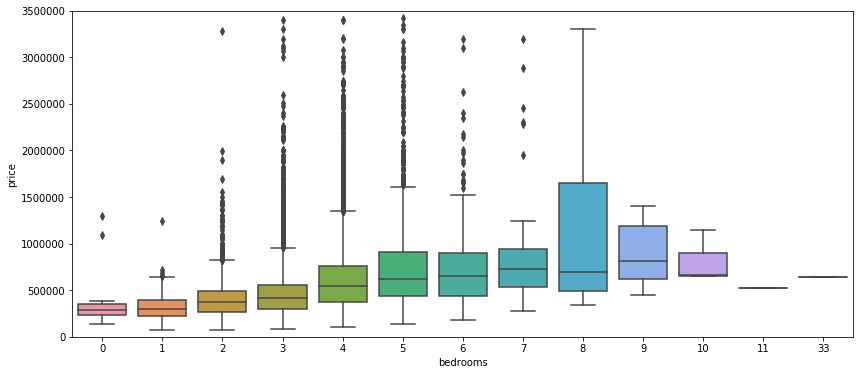

In [119]:
var = 'bedrooms'
data = pd.concat([kc_df['price'], kc_df[var]], axis=1)
f, ax = plt.subplots(figsize=(14, 6))
fig = sns.boxplot(x=var, y="price", data=data)
fig.axis(ymin=0, ymax=3500000);

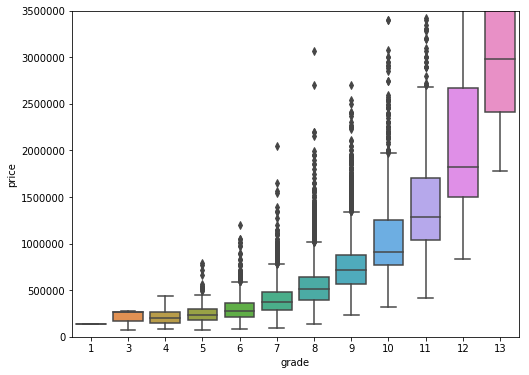

In [120]:
var = 'grade'
data = pd.concat([kc_df['price'], kc_df[var]], axis=1)
f, ax = plt.subplots(figsize=(8, 6))
fig = sns.boxplot(x=var, y="price", data=data)
fig.axis(ymin=0, ymax=3500000);

(-0.5, 29.5, 0, 3500000)

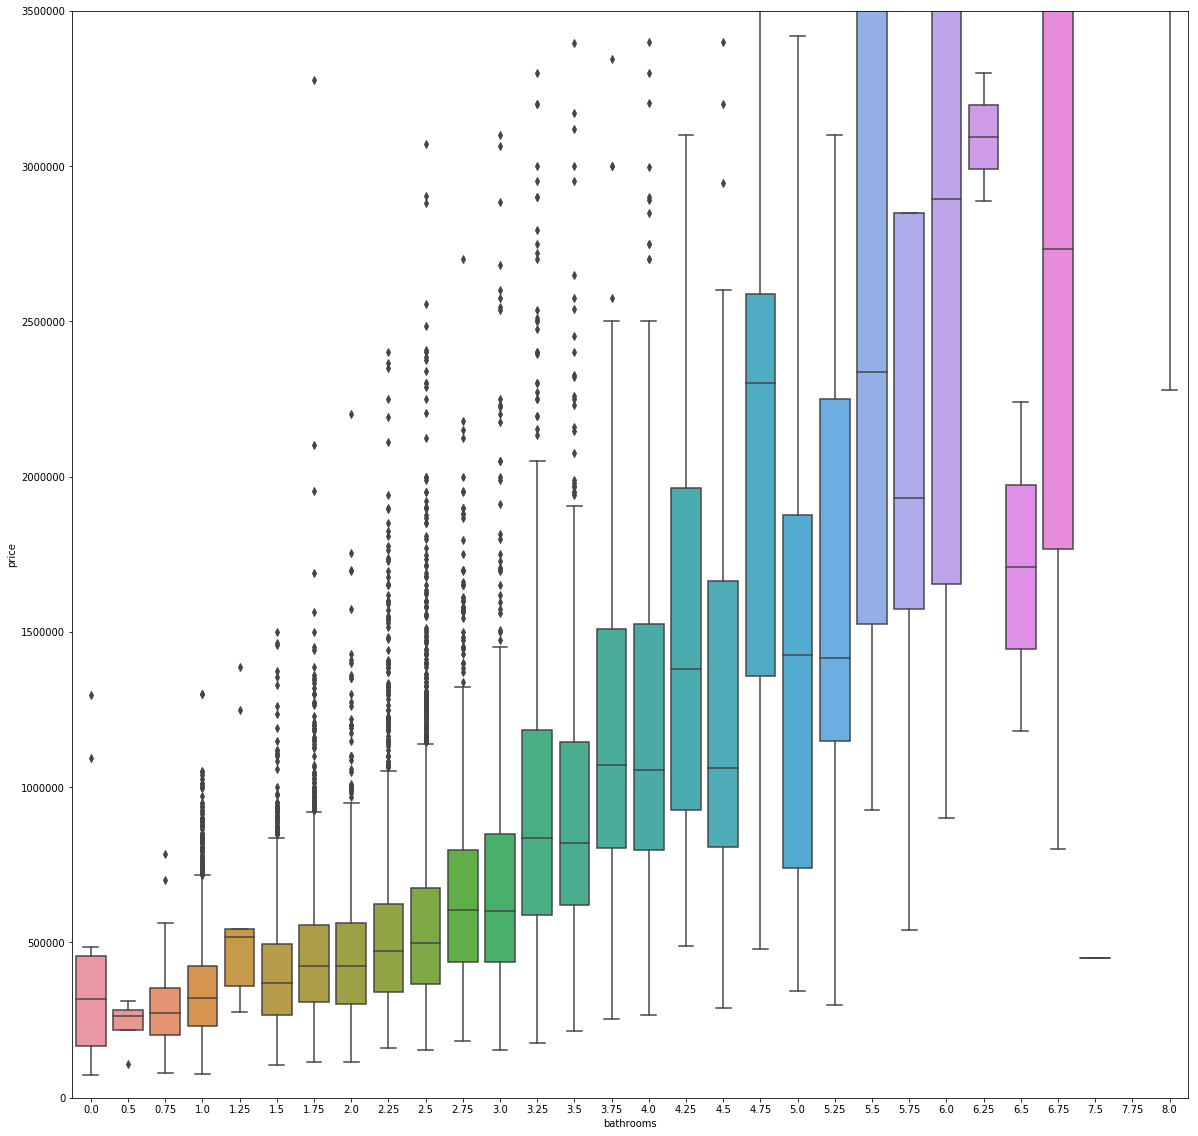

In [121]:
var = 'bathrooms'
data = pd.concat([kc_df['price'], kc_df[var]], axis=1)
f, ax = plt.subplots(figsize=(20, 20))
fig = sns.boxplot(x=var, y="price", data=data)
fig.axis(ymin=0, ymax=3500000)

###### Clearly, as the features "bathrooms", "grade", "bedrooms" increase, so does the SalePrice. This is most evident in case of the features bathrooms and grade.

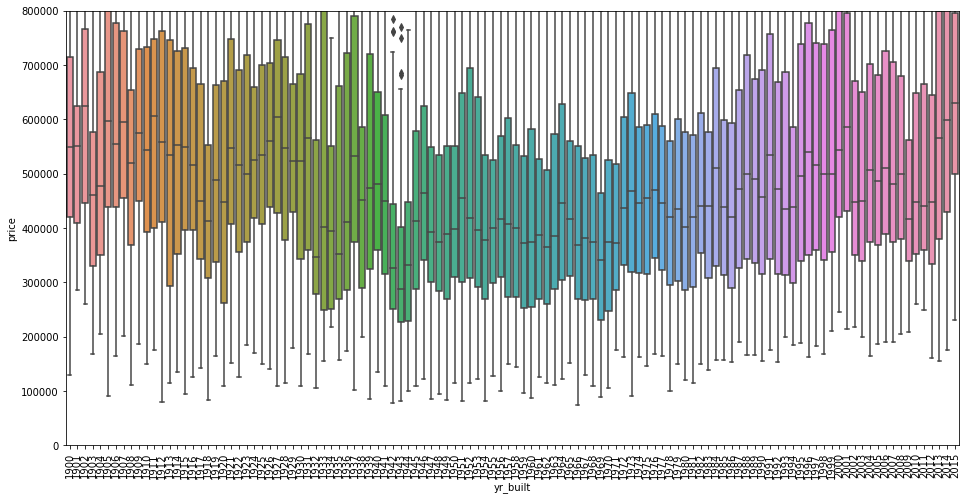

In [122]:
var = 'yr_built'
data = pd.concat([kc_df['price'], kc_df[var]], axis=1)
f, ax = plt.subplots(figsize=(16, 8))
fig = sns.boxplot(x=var, y="price", data=data)
fig.axis(ymin=0, ymax=800000);
plt.xticks(rotation=90);

##### one would expect a linear relationship with newer houses being significantly more expensive. However, this is not the case, as seen by the graph.

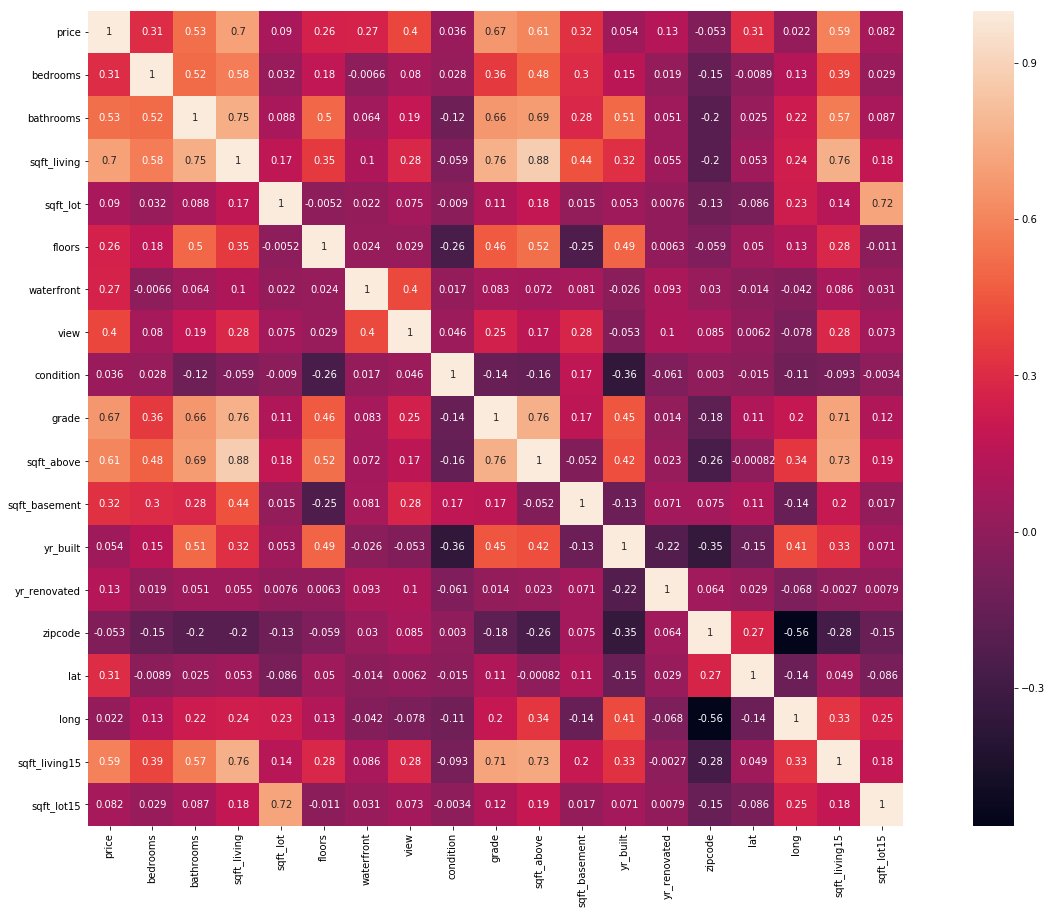

In [123]:
corrmat = kc_df.corr()
fig,ax= plt.subplots()
fig.set_size_inches(25,15)
sns.heatmap(corrmat,square=True,annot=True)

##### Using the correlation matrix, we can see which variables play a large part in determining the price. We will be dropping longitude and latitude because zipcode would provide more than enough information regarding location. The values of sqft_living already includes sqft_above and sqft_basement parameters, so we will be dropping these in the model and converting sqft_basement and yr_renovated to binary values to indicate whether or not there exists a basement and renvation done or not. square foot living area, grade(amount of floors), square feet aboue the ground level and sqft_15 features displayed the highest correlation wih the price of the house.Moreover, there is a high correlation of sqft_living with e.g. number of bathrooms and grade. This means as the square feet increase, so does the number of floors and bathrooms.

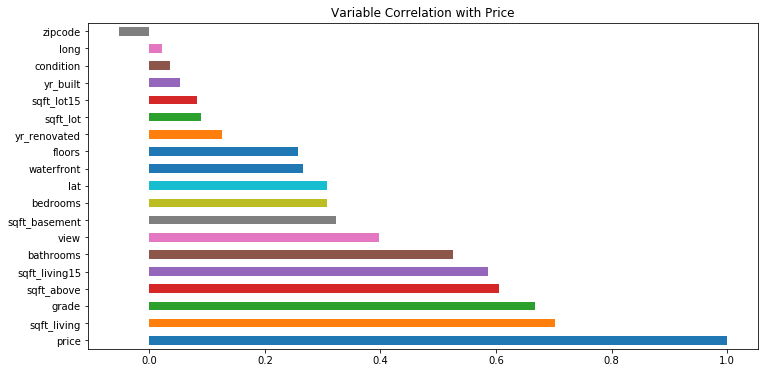

In [124]:
plt.figure(figsize=(12, 6))
kc_df.corr()['price'].sort_values(ascending=False).plot(
    'barh', figsize=(12, 6), title='Variable Correlation with Price'
)
plt.show()

C:\Anaconda3\lib\site-packages\seaborn\axisgrid.py:2065: UserWarning: The `size` parameter has been renamed to `height`; pleaes update your code.
  warnings.warn(msg, UserWarning)


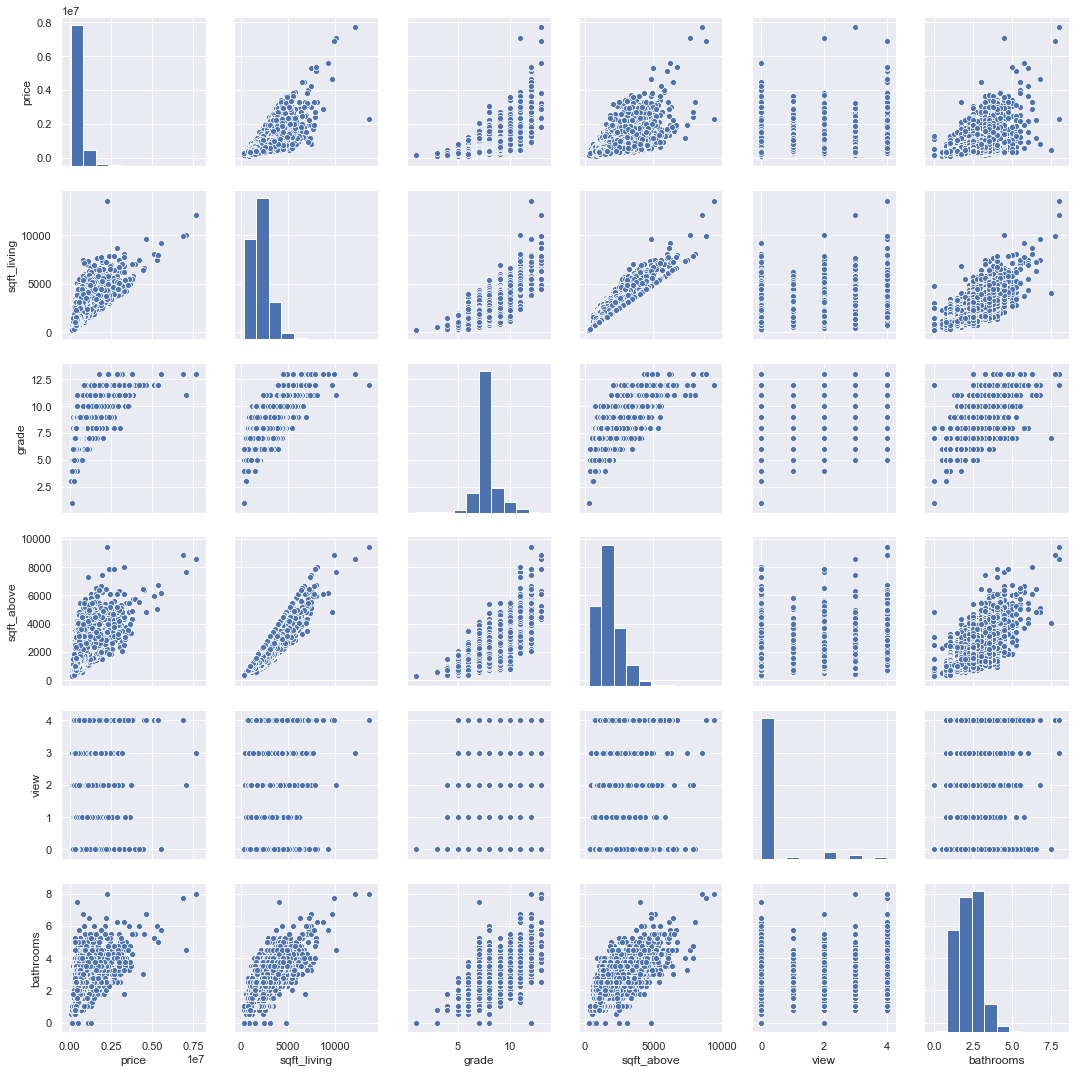

In [38]:
#scatterplot
sns.set()
cols = ['price', 'sqft_living', 'grade', 'sqft_above', 'view', 'bathrooms']
sns.pairplot(kc_df[cols], size = 2.5)
plt.show();

###### These overall scatterplots confirm the findings of the heatmap. There is myriad of linear correlation between sqft_living, sqft_above, bathrooms and grade. This yields an opportunity for to combine features. Moreover, what we learned that the above mentioned features have the biggest impact on sale price. One would also expect location to play a role, but as they are in latitude/longitude coordinates, it requires advanced data manipulation to take it into account. Finally, due to many linear relationships we can apply regression models.¶

In [98]:
cols_to_keep = ['price', 'bedrooms', 'bathrooms', 'sqft_living', 'grade', 'sqft_living15']
df = kc_df[cols_to_keep]

df.head()

,price,bedrooms,bathrooms,sqft_living,grade,sqft_living15
0,12.309982,3,1.00,1180,7,1340
1,13.195614,3,2.25,2570,7,1690
2,12.100712,2,1.00,770,6,2720
3,13.311329,4,3.00,1960,7,1360
4,13.142166,3,2.00,1680,8,1800


In [152]:
#standardizing data to mitigate skewdness and kurtosis
from sklearn.preprocessing import StandardScaler
saleprice_scaled = StandardScaler().fit_transform(kc_df['price'][:,np.newaxis]);
low_range = saleprice_scaled[saleprice_scaled[:,0].argsort()][:10]
high_range= saleprice_scaled[saleprice_scaled[:,0].argsort()][-10:]
print('outer range (low) of the distribution:')
print(low_range)
print('\nouter range (high) of the distribution:')
print(high_range)

outer range (low) of the distribution:
[[-1.26686039]
 [-1.25868864]
 [-1.25324081]
 [-1.2505169 ]
 [-1.24779298]
 [-1.24643103]
 [-1.24506907]
 [-1.24234515]
 [-1.23962124]
 [-1.23962124]]

outer range (high) of the distribution:
[[10.75649871]
 [10.78646177]
 [11.24407943]
 [12.45022882]
 [12.96559346]
 [13.10178919]
 [13.70105041]
 [17.28299812]
 [17.76649297]
 [19.50298853]]


##### Let's normalise the price and sqft_living feature

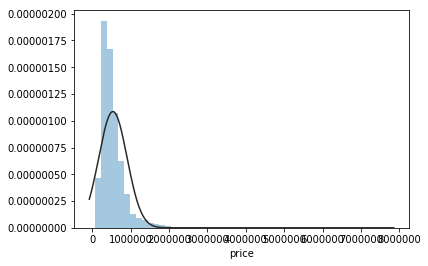

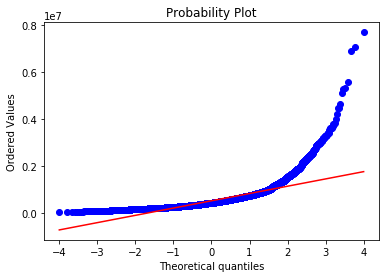

In [125]:
from scipy.stats import norm
from scipy import stats
#histogram and normal probability plot
sns.distplot(kc_df['price'], fit=norm, bins=50, kde=False);
fig = plt.figure()
res = stats.probplot(kc_df['price'], plot=plt)

In [63]:
#applying log transformation
kc_df['price'] = np.log(kc_df['price'])

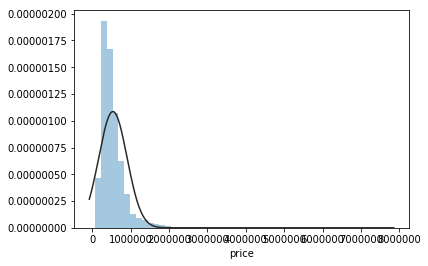

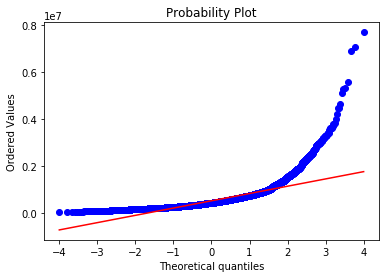

In [126]:
#transformed histogram and normal probability plot
sns.distplot(kc_df['price'], fit=norm,  bins=50, kde=False);
fig = plt.figure()
res = stats.probplot(kc_df['price'], plot=plt)

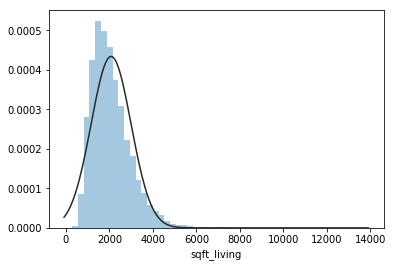

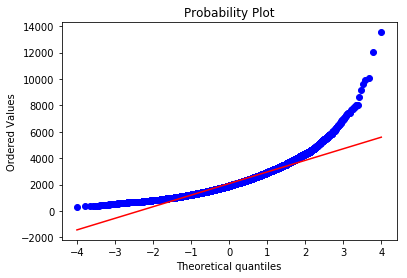

In [127]:
#histogram and normal probability plot
sns.distplot(kc_df['sqft_living'], fit=norm, bins=50, kde=False);
fig = plt.figure()
res = stats.probplot(kc_df['sqft_living'], plot=plt)

In [128]:
#data transformation
df['sqft_living'] = np.log(df['sqft_living'])

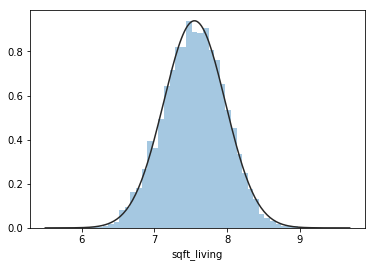

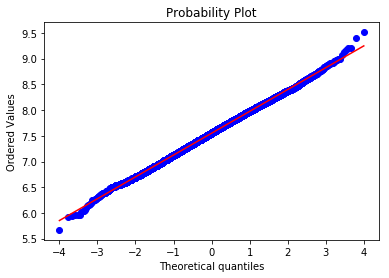

In [129]:
#transformed histogram and normal probability plot
sns.distplot(df['sqft_living'], fit=norm, bins=50, kde=False);
fig = plt.figure()
res = stats.probplot(df['sqft_living'], plot=plt)

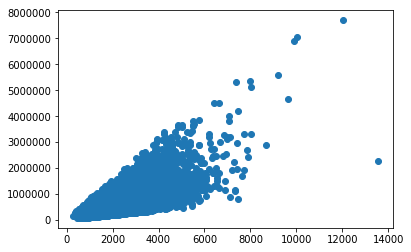

In [130]:
#scatter plot
plt.scatter(kc_df['sqft_living'], kc_df['price']);

##### Now there is a nice linear relationship between the features

# Build a linear regression model to predict the house prices

In [70]:
Y = kc_df.price.values
feature_cols = ['bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors',
       'view', 'condition', 'grade', 'sqft_above',
       'sqft_basement', 'yr_built', 'yr_renovated',  'lat', 'long',
       'sqft_living15', 'sqft_lot15']
X=kc_df[feature_cols]

In [71]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(X, Y, random_state=3)

In [72]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(x_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [73]:
accuracy = regressor.score(x_test, y_test)
"Accuracy: {}%".format(int(round(accuracy * 100)))

'Accuracy: 77%'

# Try to find out important features or create new features to improve the performance for your model

In [197]:
# Convert sqft_basement and yr_renovated to binary
kc_df['sqft_basement'] = kc_df['sqft_basement'].map(lambda x: 1 if x > 0 else 0)
kc_df['Is_renovated'] = kc_df['yr_renovated'].apply(lambda x: 1 if x > 0 else 0)
kc_df.head()

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,...,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,Is_renovated
0,2014-10-13,221900.0,3,1.00,1180,5650,1.0,0,0,3,...,1180,0,1955,0,98178,47.5112,-122.257,1340,5650,0
1,2014-12-09,538000.0,3,2.25,2570,7242,2.0,0,0,3,...,2170,1,1951,1991,98125,47.7210,-122.319,1690,7639,1
2,2015-02-25,180000.0,2,1.00,770,10000,1.0,0,0,3,...,770,0,1933,0,98028,47.7379,-122.233,2720,8062,0
3,2014-12-09,604000.0,4,3.00,1960,5000,1.0,0,0,5,...,1050,1,1965,0,98136,47.5208,-122.393,1360,5000,0
4,2015-02-18,510000.0,3,2.00,1680,8080,1.0,0,0,3,...,1680,0,1987,0,98074,47.6168,-122.045,1800,7503,0


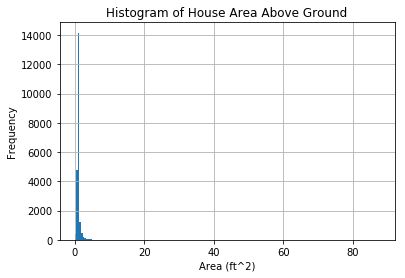

In [198]:
lot15_ratio = np.divide(kc_df.sqft_lot, kc_df.sqft_lot15)
lot15_ratio.hist(bins=200)
plt.title('Histogram of House Area Above Ground')
plt.xlabel("Area (ft^2)")
plt.ylabel('Frequency')
plt.show()

###### Looking at the plot above, we can see that there is a skewed but still somewhat normal distribution for this ratio. I shall add this data (lot15_ratio), remove sqft_lot15, and remove the other pair-wise correlation problematic columns chosen earlier

In [199]:
kc_df_mcf = kc_df.drop(['sqft_lot15','sqft_living','sqft_living15','sqft_above'], axis=1)
# New dataframe will have multicollinearity problems removed.
kc_df_mcf['lot15_ratio'] = lot15_ratio
# New dataframe has information on neighbourhood comparison added to it.

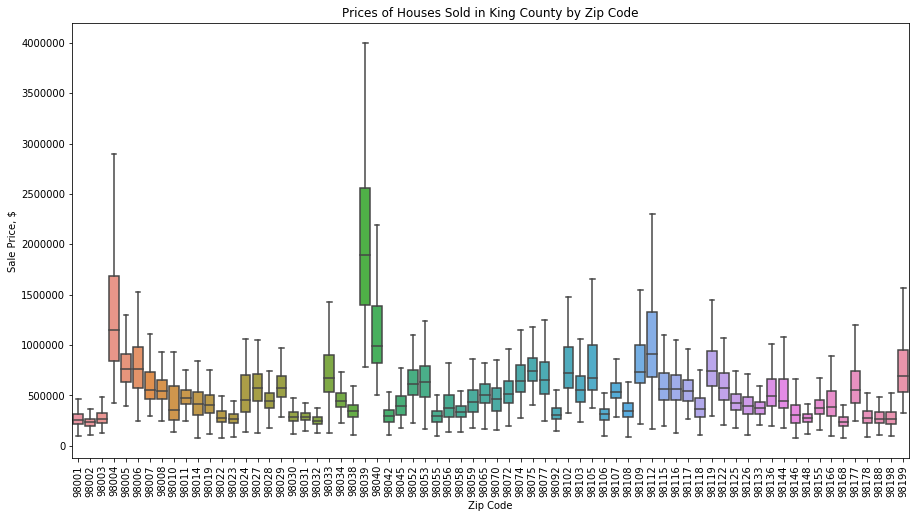

In [200]:
fig = plt.figure(figsize = (15,8))
fig = sns.boxplot(x='zipcode', y='price', data=kc_df, showfliers = False)
plt.title('Prices of Houses Sold in King County by Zip Code')
plt.xlabel("Zip Code")
plt.xticks(rotation=90)
plt.ylabel('Sale Price, $')
plt.show()

<Figure size 720x504 with 0 Axes>

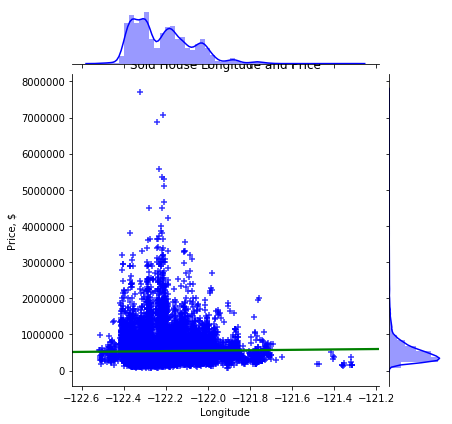

In [201]:
fig = plt.figure(figsize = (10,7))
fig = sns.jointplot(kc_df_mcf.long, kc_df_mcf.price, marker='+', kind='reg', color='blue',
                  joint_kws={'line_kws':{'color':'green'}})
plt.title('Sold House Longitude and Price')
plt.xlabel("Longitude")
plt.ylabel('Price, $')
plt.show()

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000024EE36A9278>,
      dtype=object)

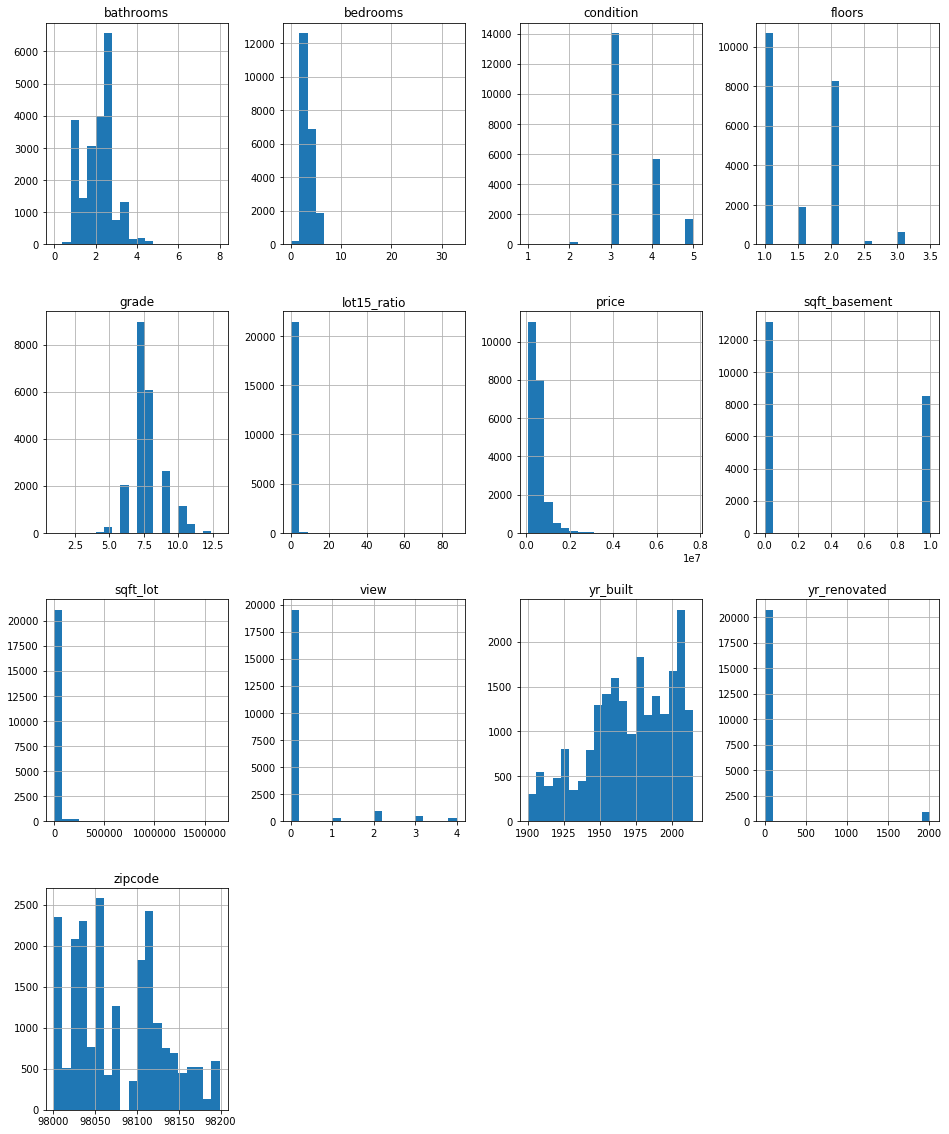

In [195]:
kc_df_mcf.hist(column=['price','bedrooms','bathrooms','sqft_lot','floors',\
                       'view','condition','grade','sqft_basement','yr_built',\
                       'yr_renovated','zipcode','lot15_ratio'], bins=20, figsize=(16,20))

##### I think I should: log format bathrooms, price, lot15_ratio, rad, and sqft_lot; change yr_renovated and sqft_basement to boolean; one-hot encode floors, view, zipcode. These changes will be made and put into a new dataframe version.

In [202]:
# Log scale some variables
log_bathrooms = np.log(kc_df_mcf.bathrooms)
log_price = np.log(kc_df_mcf.price)
log_lot15_ratio = np.log(kc_df_mcf.lot15_ratio)
log_sqft_lot = np.log(kc_df_mcf.sqft_lot)

# Drop old versions from dataframe and add log scaled versions.
kc_df_features = kc_df_mcf.drop(['bathrooms','price','lot15_ratio','sqft_lot'], axis=1)
kc_df_features['log_bathrooms'] = log_bathrooms
kc_df_features['log_price'] = log_price
kc_df_features['log_lot15_ratio'] = log_lot15_ratio
kc_df_features['log_sqft_lot'] = log_sqft_lot

In [203]:
# Add boolean version of yr_renovated and sqft_basement.
kc_df_features['renovated'] = kc_df_features['yr_renovated'].astype(bool)
kc_df_features['basement'] = kc_df_features['sqft_basement'].astype(bool)
# Remove non-boolean options.
kc_df_features.drop('yr_renovated', axis=1, inplace=True)
kc_df_features.drop('sqft_basement', axis=1, inplace=True)

In [204]:
# Create dummy variables for classified variables.
floors_dummy = pd.get_dummies(kc_df_features.floors, prefix="FLOORS")
view_dummy = pd.get_dummies(kc_df_features.view, prefix="VIEW")
zipcode_dummy = pd.get_dummies(kc_df_features.zipcode, prefix="ZIPCODE")

# Remove non-dummy versions.
kc_df_features.drop(['floors','view','zipcode'], axis=1, inplace=True)

# Merge dummy variables onto dataframe.
kc_df_features = pd.concat([kc_df_features, floors_dummy, view_dummy, zipcode_dummy], axis=1)

In [205]:
kc_df_features.columns

Index(['date', 'bedrooms', 'waterfront', 'condition', 'grade', 'yr_built',
       'lat', 'long', 'Is_renovated', 'log_bathrooms', 'log_price',
       'log_lot15_ratio', 'log_sqft_lot', 'renovated', 'basement',
       'FLOORS_1.0', 'FLOORS_1.5', 'FLOORS_2.0', 'FLOORS_2.5', 'FLOORS_3.0',
       'FLOORS_3.5', 'VIEW_0', 'VIEW_1', 'VIEW_2', 'VIEW_3', 'VIEW_4',
       'ZIPCODE_98001', 'ZIPCODE_98002', 'ZIPCODE_98003', 'ZIPCODE_98004',
       'ZIPCODE_98005', 'ZIPCODE_98006', 'ZIPCODE_98007', 'ZIPCODE_98008',
       'ZIPCODE_98010', 'ZIPCODE_98011', 'ZIPCODE_98014', 'ZIPCODE_98019',
       'ZIPCODE_98022', 'ZIPCODE_98023', 'ZIPCODE_98024', 'ZIPCODE_98027',
       'ZIPCODE_98028', 'ZIPCODE_98029', 'ZIPCODE_98030', 'ZIPCODE_98031',
       'ZIPCODE_98032', 'ZIPCODE_98033', 'ZIPCODE_98034', 'ZIPCODE_98038',
       'ZIPCODE_98039', 'ZIPCODE_98040', 'ZIPCODE_98042', 'ZIPCODE_98045',
       'ZIPCODE_98052', 'ZIPCODE_98053', 'ZIPCODE_98055', 'ZIPCODE_98056',
       'ZIPCODE_98058', 'ZIPCODE_98059', '

In [206]:
def linear_model(X_train,y_train,X_test,y_test):
    lr = LinearRegression()
    lr.fit(X_train,y_train)
    ypred = lr.predict(X_test)
    rmse = np.sqrt(mean_squared_error(y_test,(ypred)))
    print("Root mean squared error: "+ str(rmse))
    r_squared = r2_score(y_test,ypred)
    print("R-squared value: "+ str(r_squared))
    sns.regplot(x=ypred,y=y_test)

In [161]:
kc_df_features.head()

,bedrooms,waterfront,condition,grade,yr_built,lat,long,Is_renovated,log_bathrooms,log_price,...,ZIPCODE_98146,ZIPCODE_98148,ZIPCODE_98155,ZIPCODE_98166,ZIPCODE_98168,ZIPCODE_98177,ZIPCODE_98178,ZIPCODE_98188,ZIPCODE_98198,ZIPCODE_98199
0,3,0,3,7,1955,47.5112,-122.257,0,0.000000,12.309982,...,0,0,0,0,0,0,1,0,0,0
1,3,0,3,7,1951,47.7210,-122.319,1,0.810930,13.195614,...,0,0,0,0,0,0,0,0,0,0
2,2,0,3,6,1933,47.7379,-122.233,0,0.000000,12.100712,...,0,0,0,0,0,0,0,0,0,0
3,4,0,5,7,1965,47.5208,-122.393,0,1.098612,13.311329,...,0,0,0,0,0,0,0,0,0,0
4,3,0,3,8,1987,47.6168,-122.045,0,0.693147,13.142166,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
Y = df_train.SalePrice.values

Root mean squared error: 0.24834446728633824
R-squared value: 0.7762599469183563


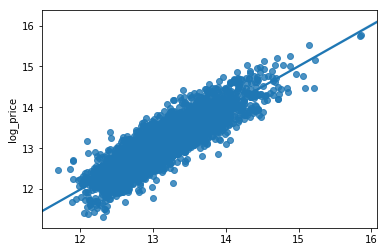

In [211]:
X = kc_df[kc_df.columns.drop(['price','date'])]
y = kc_df_features['log_price']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=0)
linear_model(X_train,y_train,X_test,y_test)

RMSE on Training set : 0.25228762565139107
RMSE on Test set : 0.2479991962590752


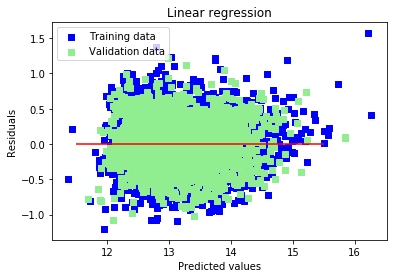

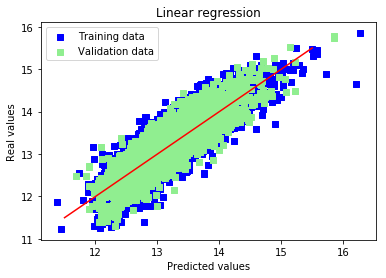

In [212]:
# Defining two functions for error measuring: RMSE
scorer = make_scorer(mean_squared_error, greater_is_better = False)

def rmse_cv_train(model):
    rmse= np.sqrt(-cross_val_score(model, X_train, y_train, scoring = scorer, cv = 10))
    return(rmse)

def rmse_cv_test(model):
    rmse= np.sqrt(-cross_val_score(model, X_test, y_test, scoring = scorer, cv = 10))
    return(rmse)

# Linear Regression
lr = LinearRegression()
lr.fit(X_train, y_train)

# Look at predictions on training and validation set
print("RMSE on Training set :", rmse_cv_train(lr).mean())
print("RMSE on Test set :", rmse_cv_test(lr).mean())
y_train_pred = lr.predict(X_train)
y_test_pred = lr.predict(X_test)

# Plot residuals
plt.scatter(y_train_pred, y_train_pred - y_train, c = "blue", marker = "s", label = "Training data")
plt.scatter(y_test_pred, y_test_pred - y_test, c = "lightgreen", marker = "s", label = "Validation data")
plt.title("Linear regression")
plt.xlabel("Predicted values")
plt.ylabel("Residuals")
plt.legend(loc = "upper left")
plt.hlines(y = 0, xmin = 11.5, xmax = 15.5, color = "red")
plt.show()

# Plot predictions
plt.scatter(y_train_pred, y_train, c = "blue", marker = "s", label = "Training data")
plt.scatter(y_test_pred, y_test, c = "lightgreen", marker = "s", label = "Validation data")
plt.title("Linear regression")
plt.xlabel("Predicted values")
plt.ylabel("Real values")
plt.legend(loc = "upper left")
plt.plot([11.5, 15.5], [11.5, 15.5], c = "red")
plt.show()

# Use appropriate cross validations techniques to find out the best predictor parameters and best prediction

Best alpha : 1.0
Try again for more precision with alphas centered around 1.0
Best alpha : 1.15
Ridge RMSE on Training set : 199045.35970685707
Ridge RMSE on Test set : 205949.64981044727


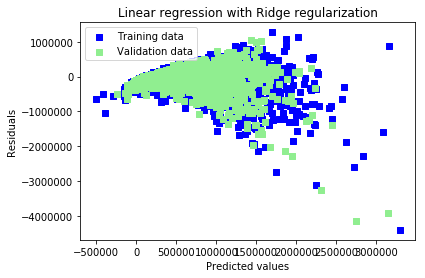

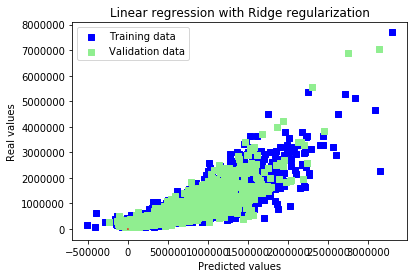

Ridge picked 18 features and eliminated the other 0 features


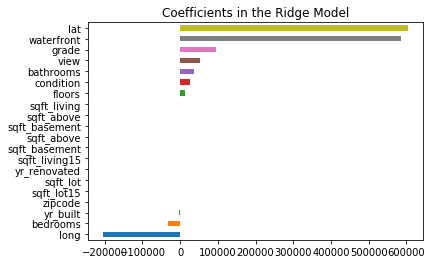

In [27]:
ridge = RidgeCV(alphas = [0.01, 0.03, 0.06, 0.1, 0.3, 0.6, 1, 3, 6, 10, 30, 60])
ridge.fit(X_train, y_train)
alpha = ridge.alpha_
print("Best alpha :", alpha)

print("Try again for more precision with alphas centered around " + str(alpha))
ridge = RidgeCV(alphas = [alpha * .6, alpha * .65, alpha * .7, alpha * .75, alpha * .8, alpha * .85, 
                          alpha * .9, alpha * .95, alpha, alpha * 1.05, alpha * 1.1, alpha * 1.15,
                          alpha * 1.25, alpha * 1.3, alpha * 1.35, alpha * 1.4], 
                cv = 10)
ridge.fit(X_train, y_train)
alpha = ridge.alpha_
print("Best alpha :", alpha)

print("Ridge RMSE on Training set :", rmse_cv_train(ridge).mean())
print("Ridge RMSE on Test set :", rmse_cv_test(ridge).mean())
y_train_rdg = ridge.predict(X_train)
y_test_rdg = ridge.predict(X_test)

# Plot residuals
plt.scatter(y_train_rdg, y_train_rdg - y_train, c = "blue", marker = "s", label = "Training data")
plt.scatter(y_test_rdg, y_test_rdg - y_test, c = "lightgreen", marker = "s", label = "Validation data")
plt.title("Linear regression with Ridge regularization")
plt.xlabel("Predicted values")
plt.ylabel("Residuals")
plt.legend(loc = "upper left")
plt.hlines(y = 0, xmin = 11.5, xmax = 15.5, color = "red")
plt.show()

# Plot predictions
plt.scatter(y_train_rdg, y_train, c = "blue", marker = "s", label = "Training data")
plt.scatter(y_test_rdg, y_test, c = "lightgreen", marker = "s", label = "Validation data")
plt.title("Linear regression with Ridge regularization")
plt.xlabel("Predicted values")
plt.ylabel("Real values")
plt.legend(loc = "upper left")
plt.plot([11.5, 15.5], [11.5, 15.5], c = "red")
plt.show()

# Plot important coefficients
coefs = pd.Series(ridge.coef_, index = X_train.columns)
print("Ridge picked " + str(sum(coefs != 0)) + " features and eliminated the other " +  \
      str(sum(coefs == 0)) + " features")
imp_coefs = pd.concat([coefs.sort_values().head(10),
                     coefs.sort_values().tail(10)])
imp_coefs.plot(kind = "barh")
plt.title("Coefficients in the Ridge Model")
plt.show()


Best alpha : 1.0
Try again for more precision with alphas centered around 1.0
Best alpha : 1.4
Lasso RMSE on Training set : 199045.56395087513
Lasso RMSE on Test set : 205980.38832531555


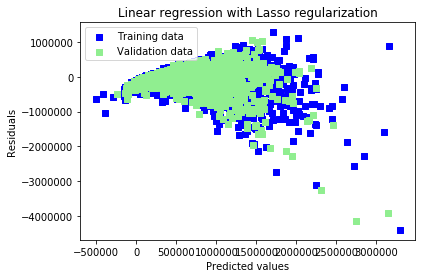

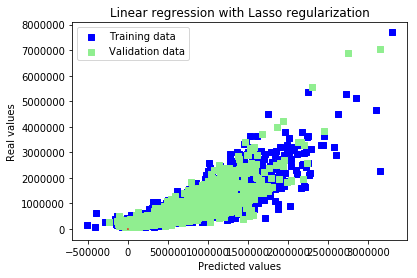

Lasso picked 18 features and eliminated the other 0 features


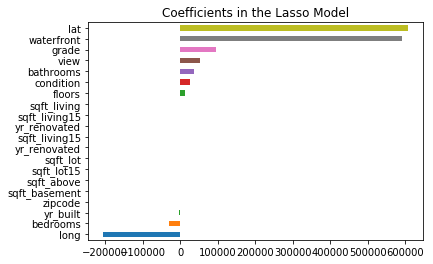

In [30]:
lasso = LassoCV(alphas = [0.0001, 0.0003, 0.0006, 0.001, 0.003, 0.006, 0.01, 0.03, 0.06, 0.1, 
                          0.3, 0.6, 1], 
                max_iter = 50000, cv = 10)
lasso.fit(X_train, y_train)
alpha = lasso.alpha_
print("Best alpha :", alpha)

print("Try again for more precision with alphas centered around " + str(alpha))
lasso = LassoCV(alphas = [alpha * .6, alpha * .65, alpha * .7, alpha * .75, alpha * .8, 
                          alpha * .85, alpha * .9, alpha * .95, alpha, alpha * 1.05, 
                          alpha * 1.1, alpha * 1.15, alpha * 1.25, alpha * 1.3, alpha * 1.35, 
                          alpha * 1.4], 
                 cv = 10)
lasso.fit(X_train, y_train)
alpha = lasso.alpha_
print("Best alpha :", alpha)

print("Lasso RMSE on Training set :", rmse_cv_train(lasso).mean())
print("Lasso RMSE on Test set :", rmse_cv_test(lasso).mean())
y_train_las = lasso.predict(X_train)
y_test_las = lasso.predict(X_test)

# Plot residuals
plt.scatter(y_train_las, y_train_las - y_train, c = "blue", marker = "s", label = "Training data")
plt.scatter(y_test_las, y_test_las - y_test, c = "lightgreen", marker = "s", label = "Validation data")
plt.title("Linear regression with Lasso regularization")
plt.xlabel("Predicted values")
plt.ylabel("Residuals")
plt.legend(loc = "upper left")
plt.hlines(y = 0, xmin = 11.5, xmax = 15.5, color = "red")
plt.show()

# Plot predictions
plt.scatter(y_train_las, y_train, c = "blue", marker = "s", label = "Training data")
plt.scatter(y_test_las, y_test, c = "lightgreen", marker = "s", label = "Validation data")
plt.title("Linear regression with Lasso regularization")
plt.xlabel("Predicted values")
plt.ylabel("Real values")
plt.legend(loc = "upper left")
plt.plot([11.5, 15.5], [11.5, 15.5], c = "red")
plt.show()

# Plot important coefficients
coefs = pd.Series(lasso.coef_, index = X_train.columns)
print("Lasso picked " + str(sum(coefs != 0)) + " features and eliminated the other " +  \
      str(sum(coefs == 0)) + " features")
imp_coefs = pd.concat([coefs.sort_values().head(10),
                     coefs.sort_values().tail(10)])
imp_coefs.plot(kind = "barh")
plt.title("Coefficients in the Lasso Model")
plt.show()